<a href="https://colab.research.google.com/github/anshi312/Crowdfunding-Success-Prediction-for-Startup-Incubator/blob/main/Optimizing_Crowdfunding_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data: https://drive.google.com/file/d/10vb1bppjLodg-Yol9BW1cYTkEn85-xSa/view?usp=sharing

In [ ]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

In [ ]:
df = pd.read_csv('Translated_Crowdfunding_Dataset.csv')

# EDA

## Basics

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   project_id              1628 non-null   int64 
 1   platform_name           1628 non-null   object
 2   crowdfunding_type       1628 non-null   object
 3   category                1628 non-null   object
 4   funding_method          1628 non-null   object
 5   project_name            1628 non-null   object
 6   project_owner           1628 non-null   object
 7   owner_gender            1628 non-null   object
 8   projects_backed         1628 non-null   int64 
 9   projects_subscribed     1628 non-null   int64 
 10  projects_owned          1628 non-null   int64 
 11  projects_in_teams       1628 non-null   int64 
 12  location                1628 non-null   object
 13  region                  1627 non-null   object
 14  year                    1628 non-null   int64 
 15  star

In [ ]:
df.isnull().sum()

,0
project_id,0
platform_name,0
crowdfunding_type,0
category,0
funding_method,0
project_name,0
project_owner,0
owner_gender,0
projects_backed,0
projects_subscribed,0


In [ ]:
df.describe()

,project_id,projects_backed,projects_subscribed,projects_owned,projects_in_teams,year,duration_days,video_length,image_count,has_faq,...,comments_count,backers_count,rewards_count,team_size,social_media_count,social_media_followers,tags_count,word_count_description,target_funding,funding_received
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1.628000e+03,1.628000e+03
mean,814.500000,0.429361,0.000614,1.165848,0.052826,2018.042383,52.004914,67.668305,5.036855,0.203317,...,1.295455,24.084767,5.979730,1.810197,1.033170,2541.066953,1.374693,354.221744,3.113431e+04,1.142884e+04
std,470.107435,2.225029,0.024784,0.710455,0.244744,2.054583,15.294526,108.145452,7.842166,1.439136,...,12.214556,82.257217,2.231298,1.851983,1.225174,19468.390705,2.142645,300.196873,6.568972e+04,8.474755e+04
min,1.000000,0.000000,0.000000,1.000000,0.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00
25%,407.750000,0.000000,0.000000,1.000000,0.000000,2017.000000,45.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,134.750000,6.150000e+03,0.000000e+00
50%,814.500000,0.000000,0.000000,1.000000,0.000000,2019.000000,60.000000,46.000000,3.000000,0.000000,...,0.000000,3.000000,6.000000,1.000000,1.000000,4.000000,0.000000,277.500000,1.500000e+04,2.500000e+02
75%,1221.250000,0.000000,0.000000,1.000000,0.000000,2020.000000,60.000000,98.250000,7.000000,0.000000,...,0.000000,18.000000,8.000000,2.000000,2.000000,498.250000,4.000000,464.250000,3.500000e+04,4.207500e+03
max,1628.000000,31.000000,1.000000,7.000000,4.000000,2021.000000,118.000000,1651.000000,221.000000,30.000000,...,400.000000,1994.000000,29.000000,28.000000,4.000000,534300.000000,12.000000,3473.000000,1.453000e+06,2.666800e+06


success_status
unsuccessful    1252
successful       376
Name: count, dtype: int64


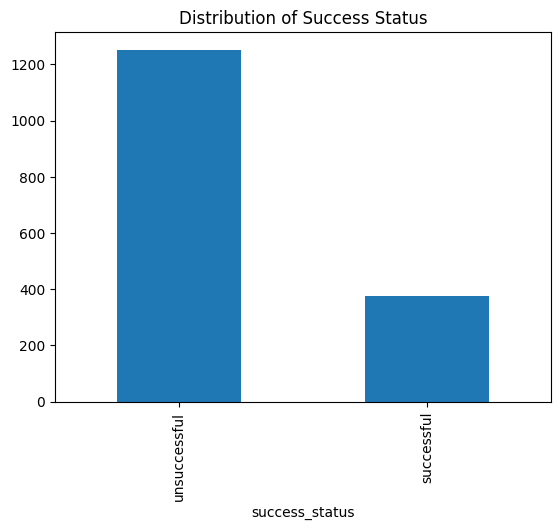

In [ ]:
df['success_status'].value_counts().plot(kind='bar', title='Distribution of Success Status')
count = df['success_status'].value_counts()
print(count)
plt.show()


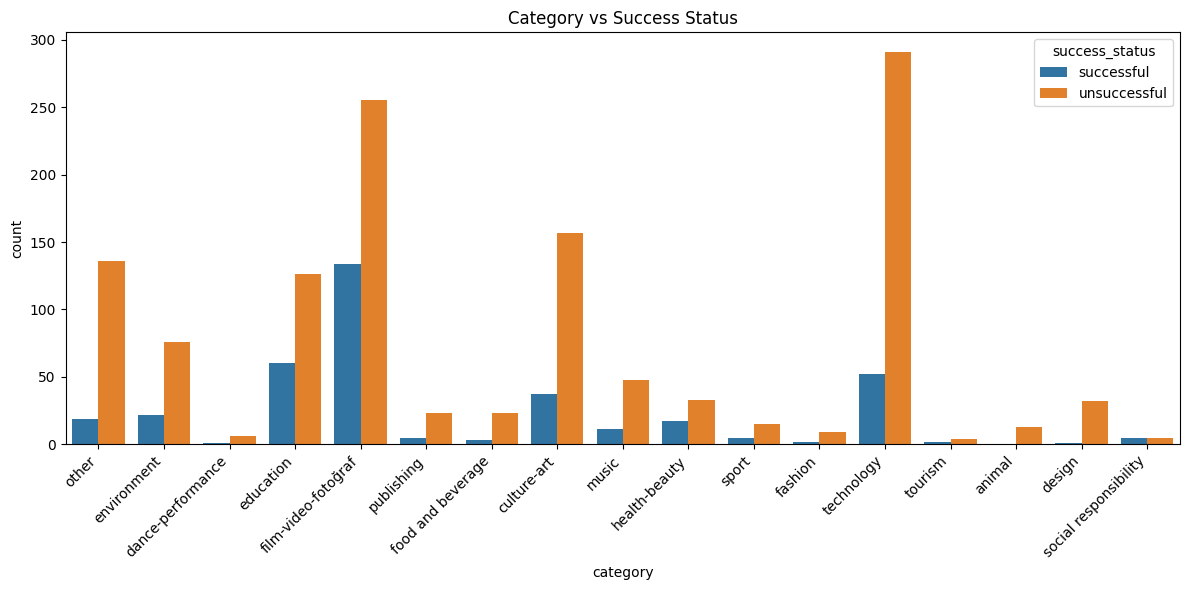

success_status         successful  unsuccessful
category                                       
animal                       0.00        100.00
culture-art                 19.07         80.93
dance-performance           14.29         85.71
design                       3.03         96.97
education                   32.26         67.74
environment                 22.45         77.55
fashion                     18.18         81.82
film-video-fotoğraf         34.45         65.55
food and beverage           11.54         88.46
health-beauty               34.00         66.00
music                       18.64         81.36
other                       12.26         87.74
publishing                  17.86         82.14
social responsibility       50.00         50.00
sport                       25.00         75.00
technology                  15.16         84.84
tourism                     33.33         66.67


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='success_status')
plt.title('Category vs Success Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

category_counts = df.groupby(['category', 'success_status']).size().unstack(fill_value=0)
category_percents = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
print(category_percents.round(2))


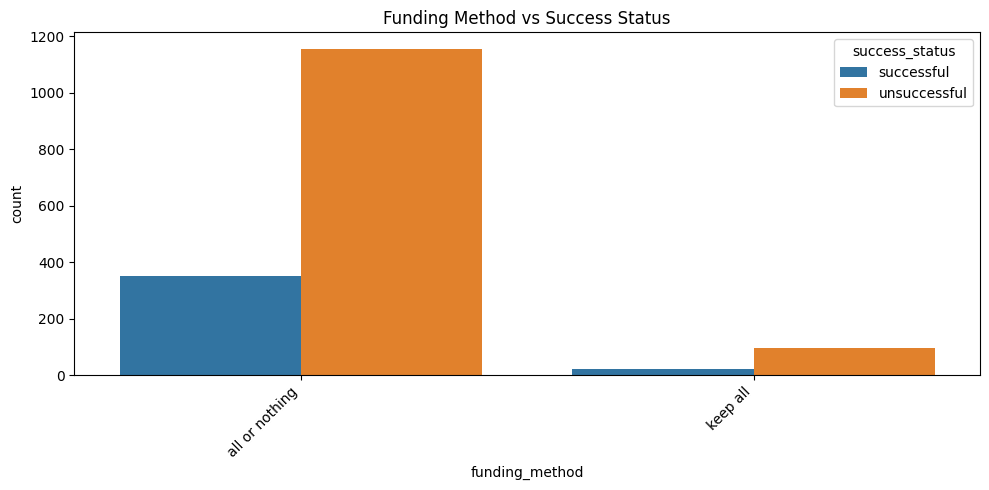

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='funding_method', hue='success_status')
plt.title('Funding Method vs Success Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

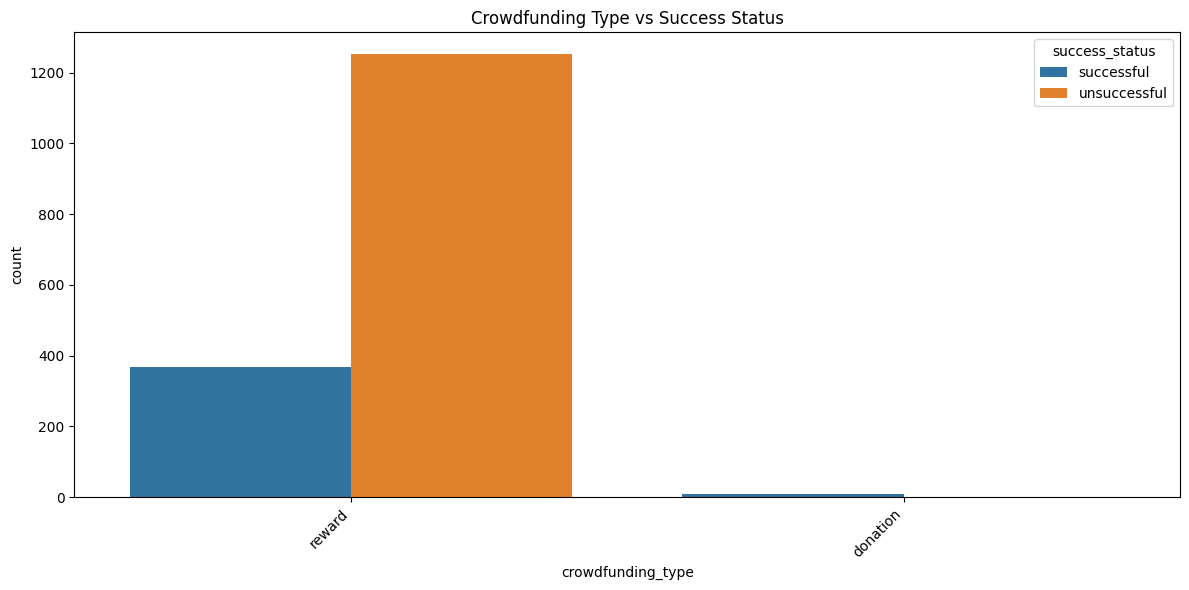

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='crowdfunding_type', hue='success_status')
plt.title('Crowdfunding Type vs Success Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


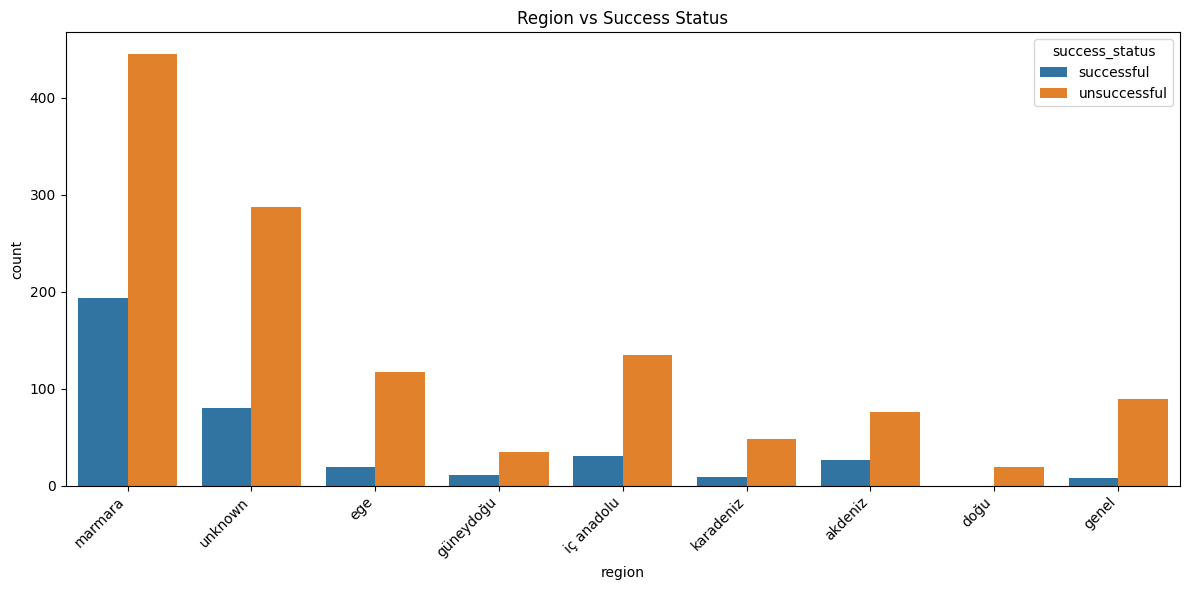

success_status  successful  unsuccessful
region                                  
akdeniz              25.49         74.51
doğu                  0.00        100.00
ege                  13.97         86.03
genel                 8.25         91.75
güneydoğu            23.91         76.09
iç anadolu           18.18         81.82
karadeniz            15.79         84.21
marmara              30.25         69.75
unknown              21.80         78.20


In [ ]:
# Histogram for region vs. success status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='region', hue='success_status')
plt.title('Region vs Success Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print percentage of successful and unsuccessful by region (rounded to 2 decimal places)
region_counts = df.groupby(['region', 'success_status']).size().unstack(fill_value=0)
region_percents = region_counts.div(region_counts.sum(axis=1), axis=0) * 100
print(region_percents.round(2))


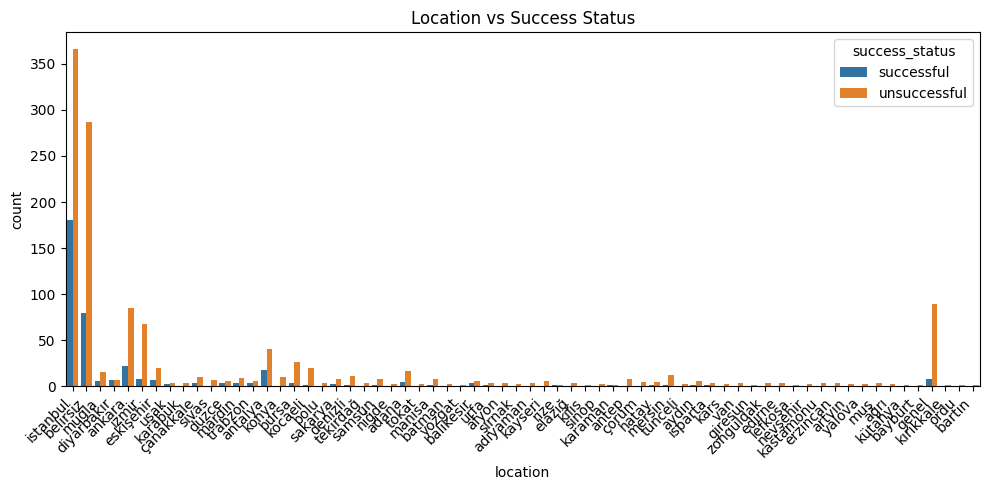

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='location', hue='success_status')
plt.title('Location vs Success Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Owner Related

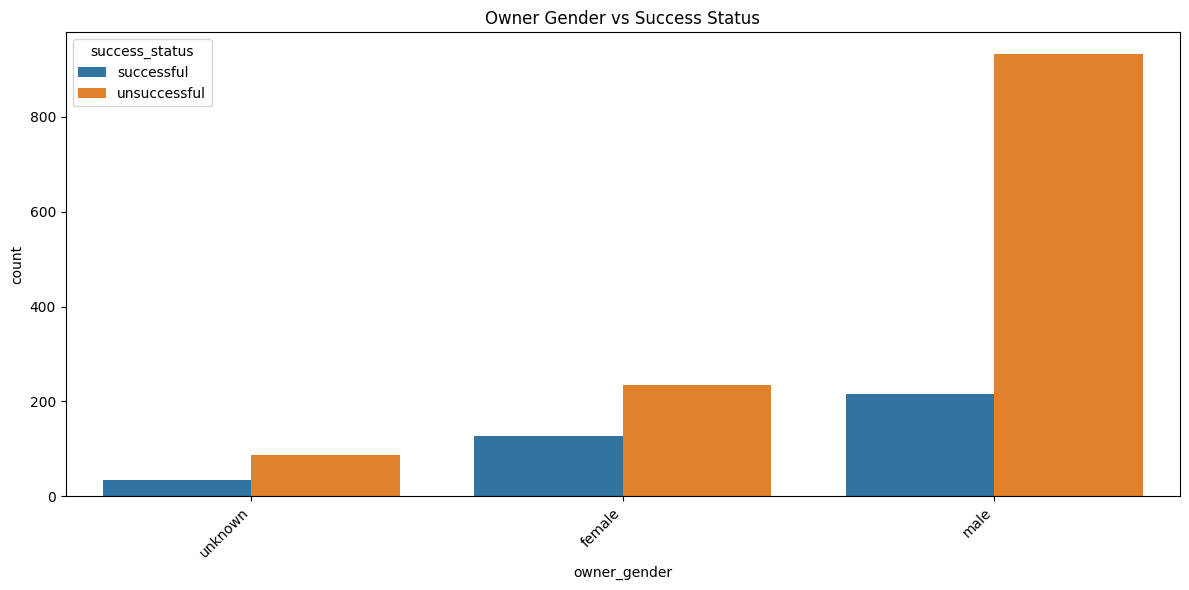

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='owner_gender', hue='success_status')
plt.title('Owner Gender vs Success Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Marketing Part

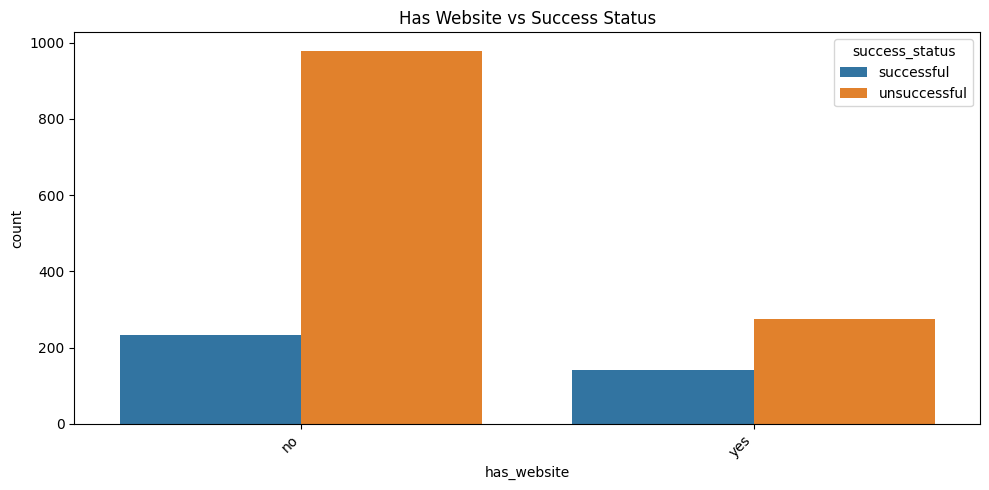

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='has_website', hue='success_status')
plt.title('Has Website vs Success Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


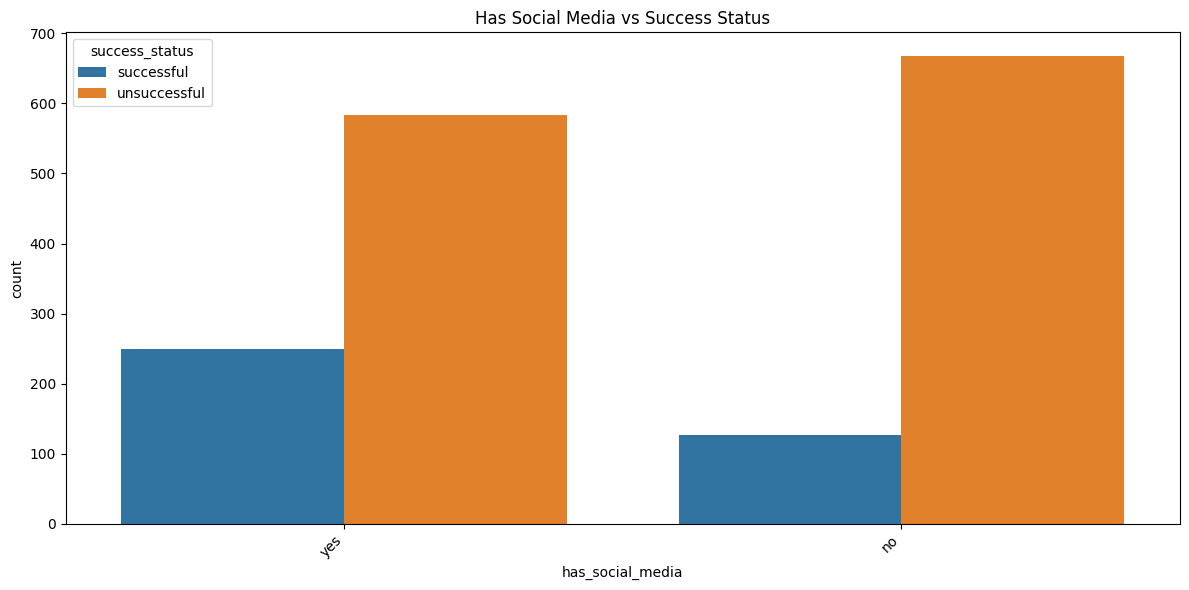

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='has_social_media', hue='success_status')
plt.title('Has Social Media vs Success Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


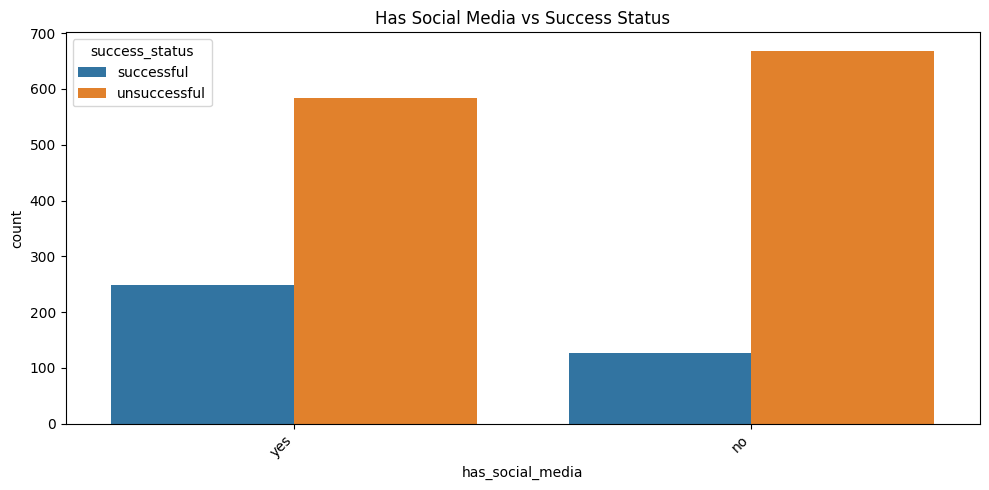

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='has_social_media', hue='success_status')
plt.title('Has Social Media vs Success Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


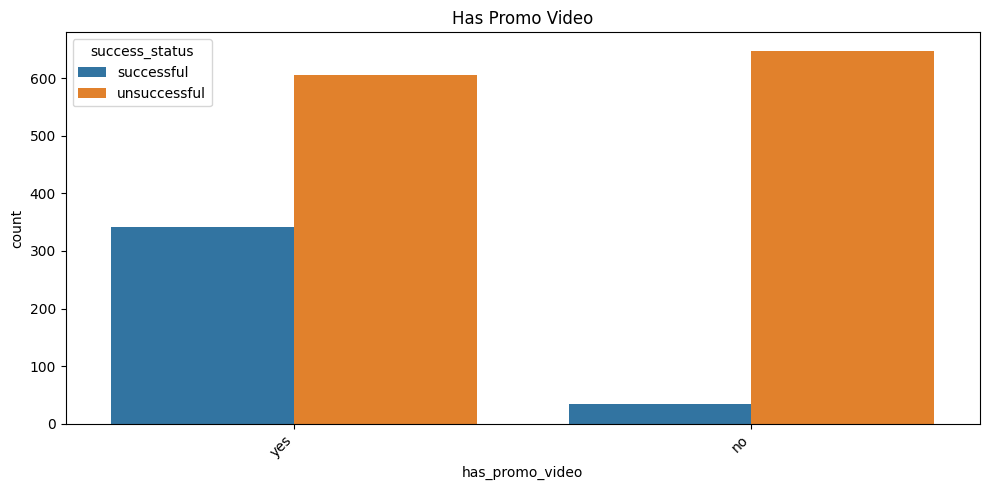

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='has_promo_video', hue='success_status')
plt.title('Has Promo Video')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Numerical

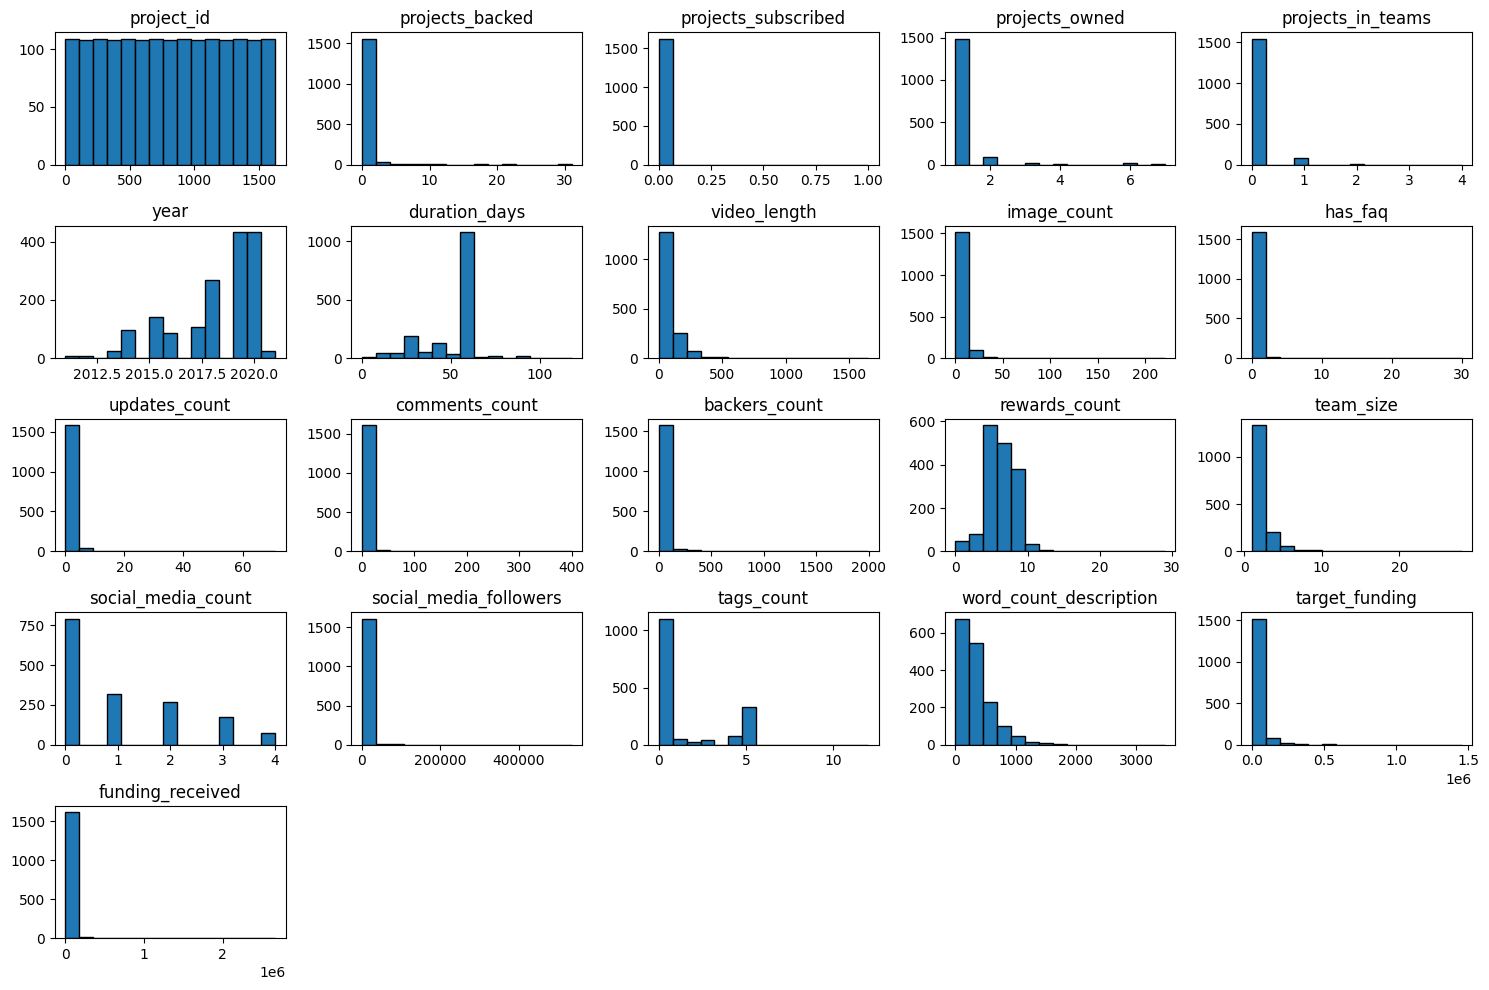

In [ ]:
df.drop(columns=['project_id'])
df.hist(bins=15, edgecolor='black', grid=False, figsize=(15, 10), layout=(5, 5))
plt.tight_layout()
plt.show()

Basic Statistics:
       projects_backed  projects_subscribed  projects_owned  \
count      1628.000000          1628.000000     1628.000000   
mean          0.429361             0.000614        1.165848   
std           2.225029             0.024784        0.710455   
min           0.000000             0.000000        1.000000   
25%           0.000000             0.000000        1.000000   
50%           0.000000             0.000000        1.000000   
75%           0.000000             0.000000        1.000000   
max          31.000000             1.000000        7.000000   

       projects_in_teams         year  duration_days  video_length  \
count        1628.000000  1628.000000    1628.000000   1628.000000   
mean            0.052826  2018.042383      52.004914     67.668305   
std             0.244744     2.054583      15.294526    108.145452   
min             0.000000  2011.000000       0.000000      0.000000   
25%             0.000000  2017.000000      45.000000      0.0000

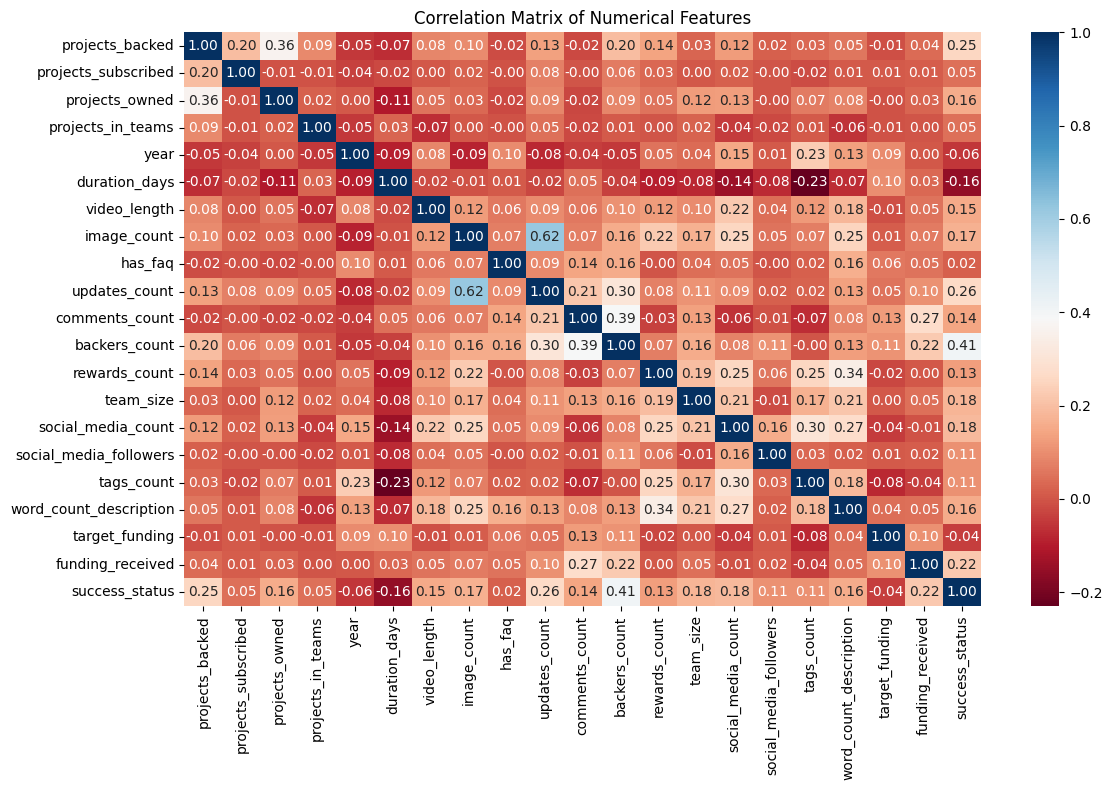

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


df = pd.read_csv('Translated_Crowdfunding_Dataset.csv')

# Drop 'project_id' as it's not relevant for analysis
df = df.drop('project_id', axis=1)

# Convert 'success_status' to binary for easier analysis
df['success_status'] = df['success_status'].map({'successful': 1, 'unsuccessful': 0})

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Basic statistics
print("Basic Statistics:")
print(df[numerical_cols].describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True,cmap="RdBu", fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

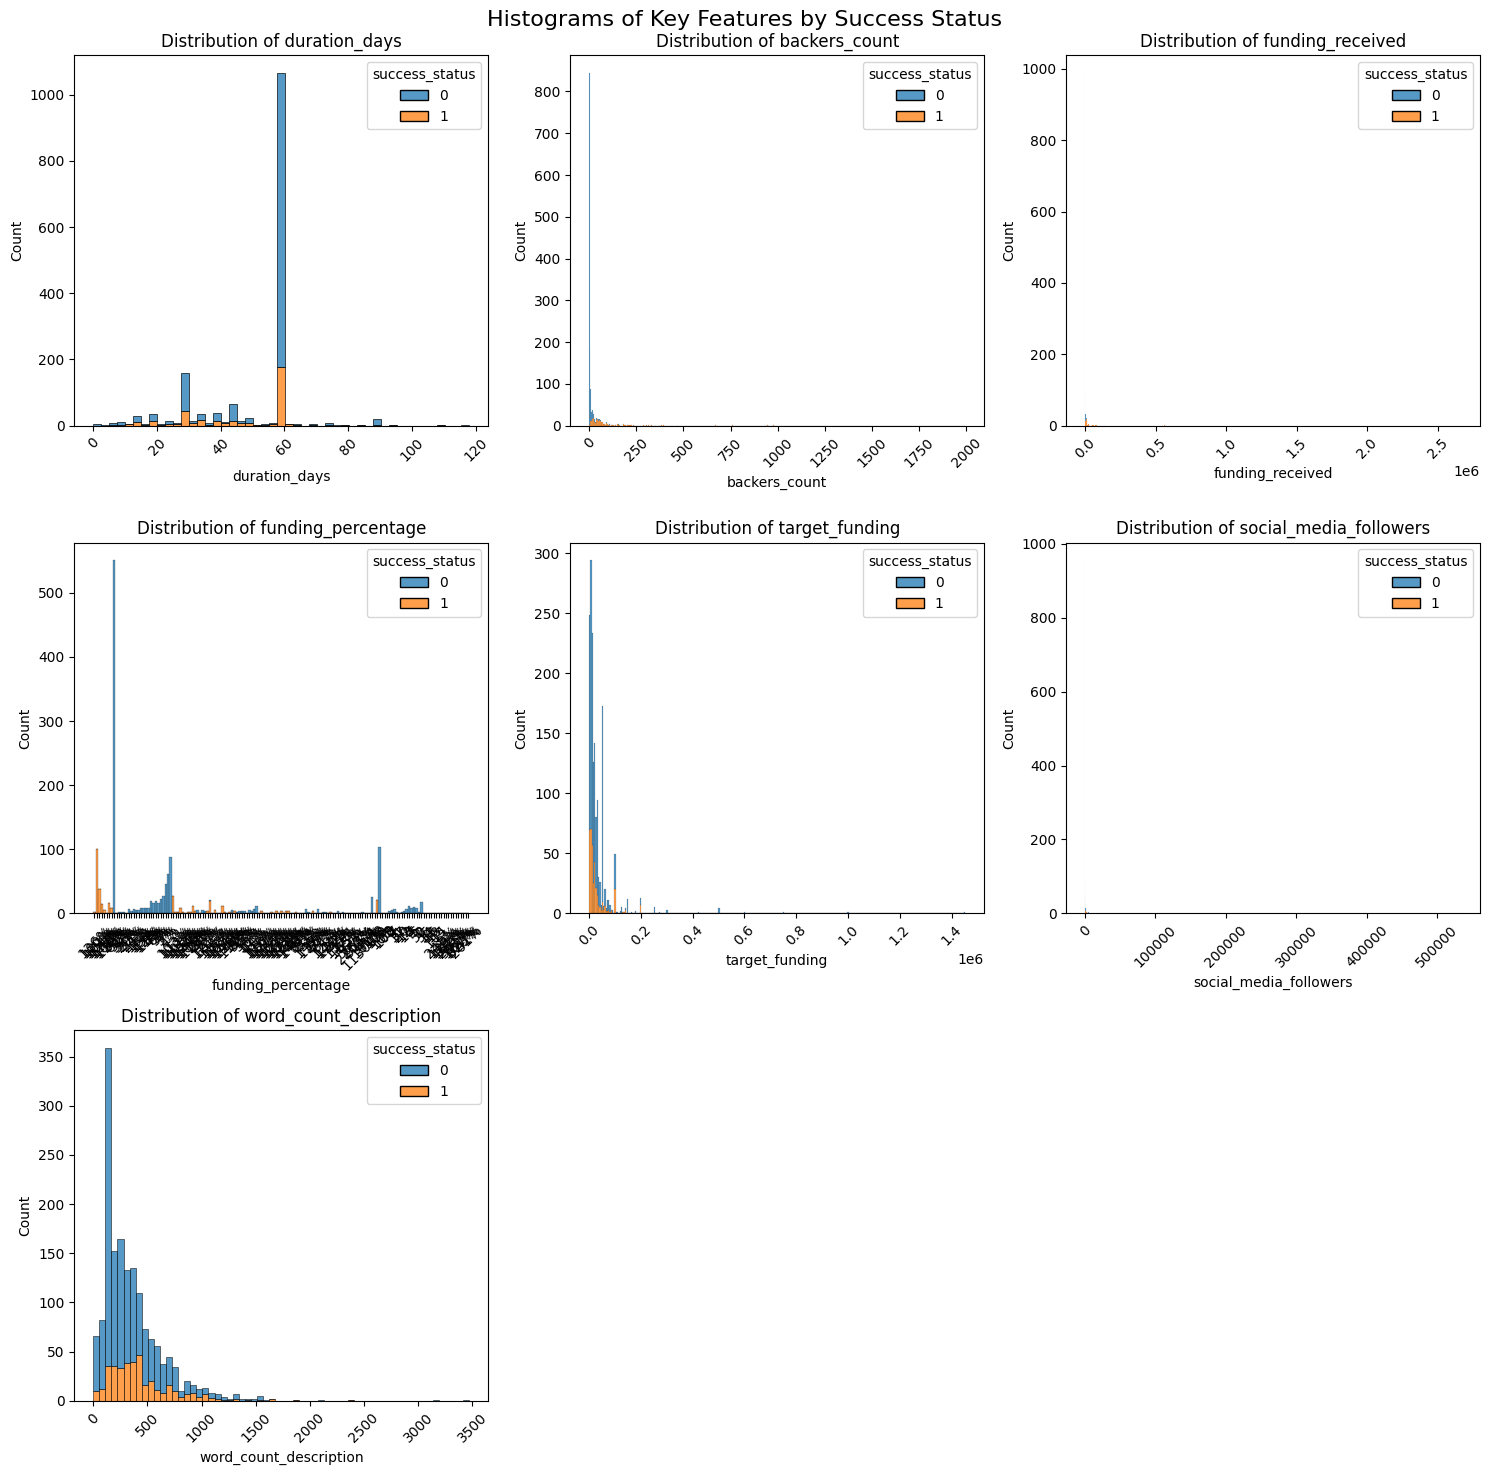

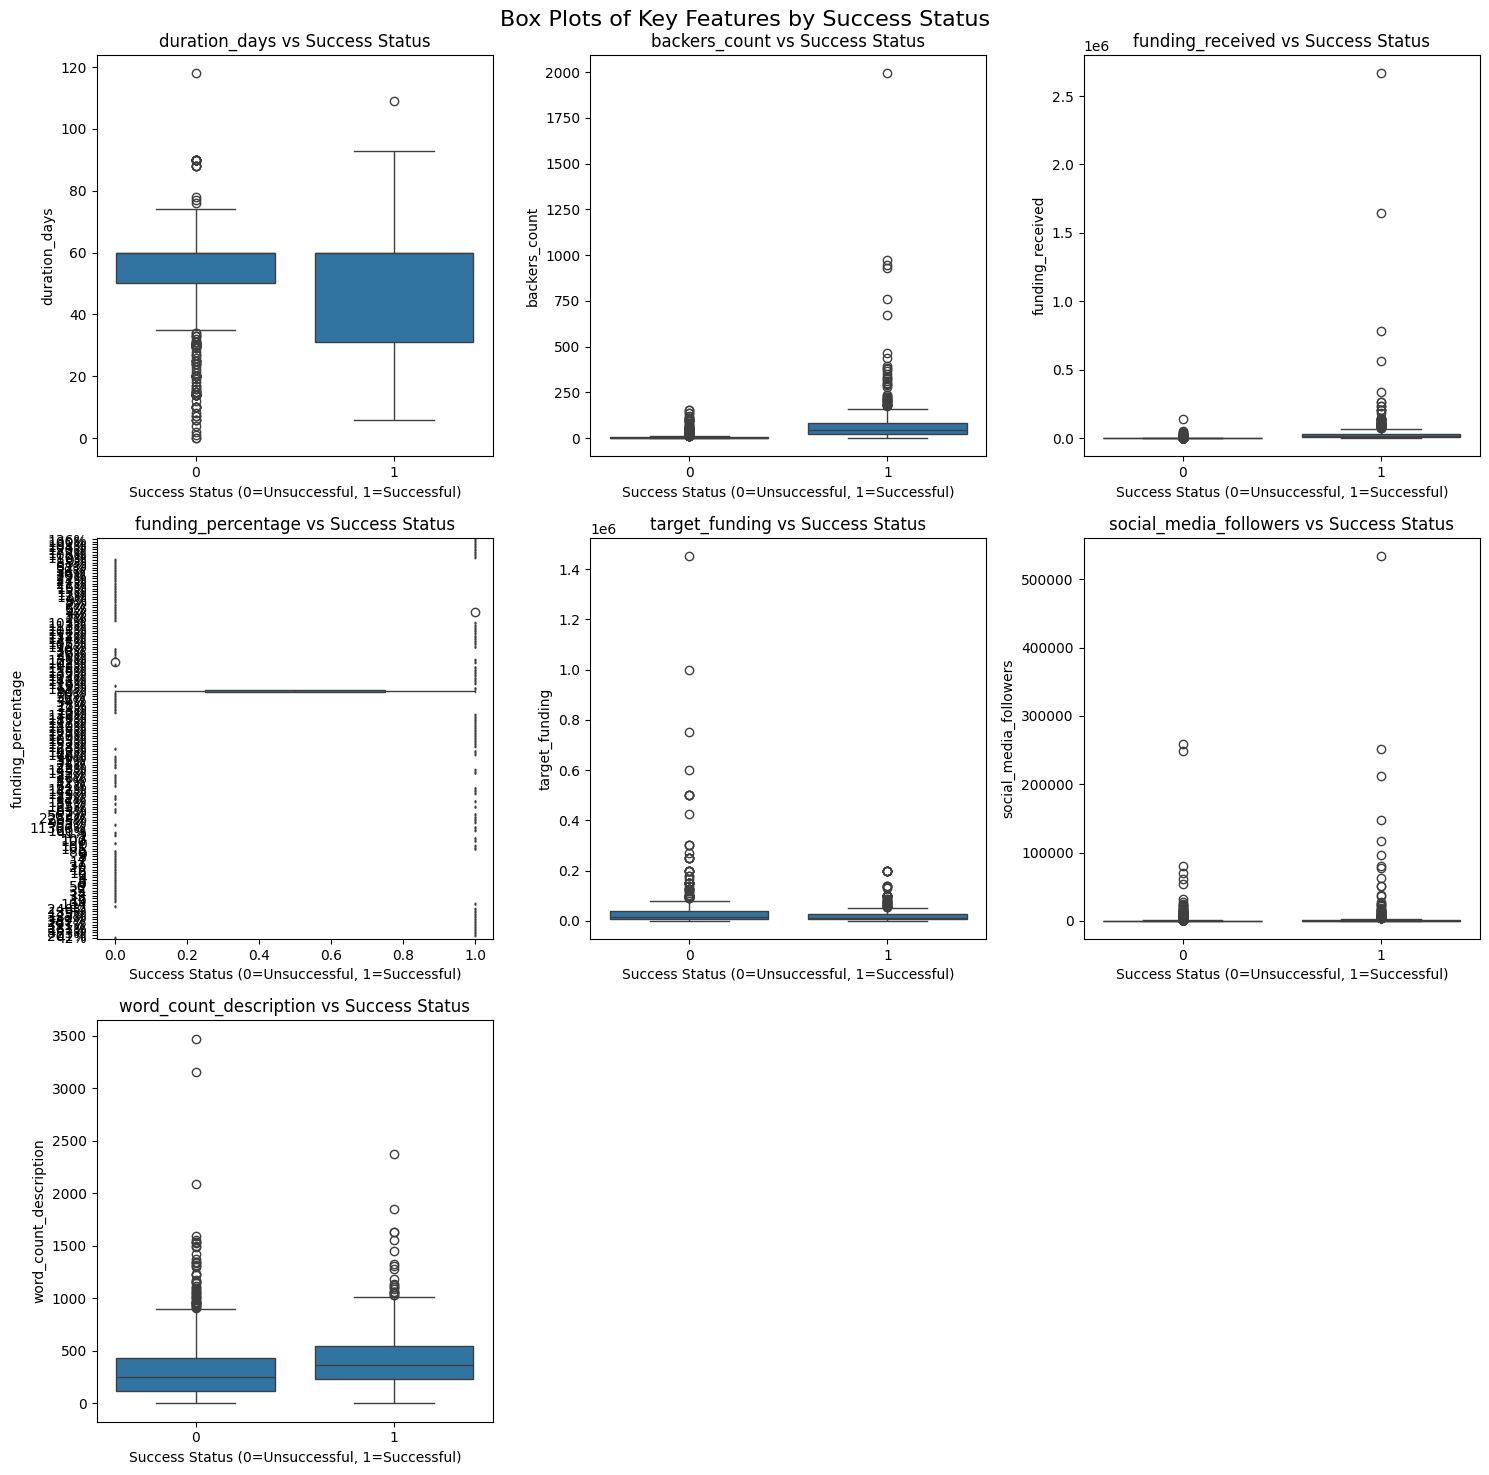

In [ ]:


# Histograms for key numerical features
key_features = ['duration_days', 'backers_count', 'funding_received', 'funding_percentage',
                'target_funding', 'social_media_followers', 'word_count_description']
n_cols = 3
n_rows = (len(key_features) + n_cols - 1) // n_cols

# Removed plt.style.use('seaborn') - Seaborn will handle styling
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Histograms of Key Features by Success Status', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(key_features):
    sns.histplot(data=df, x=col, hue='success_status', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Box plots for key features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Box Plots of Key Features by Success Status', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(key_features):
    sns.boxplot(data=df, x='success_status', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Success Status')
    axes[i].set_xlabel('Success Status (0=Unsuccessful, 1=Successful)')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

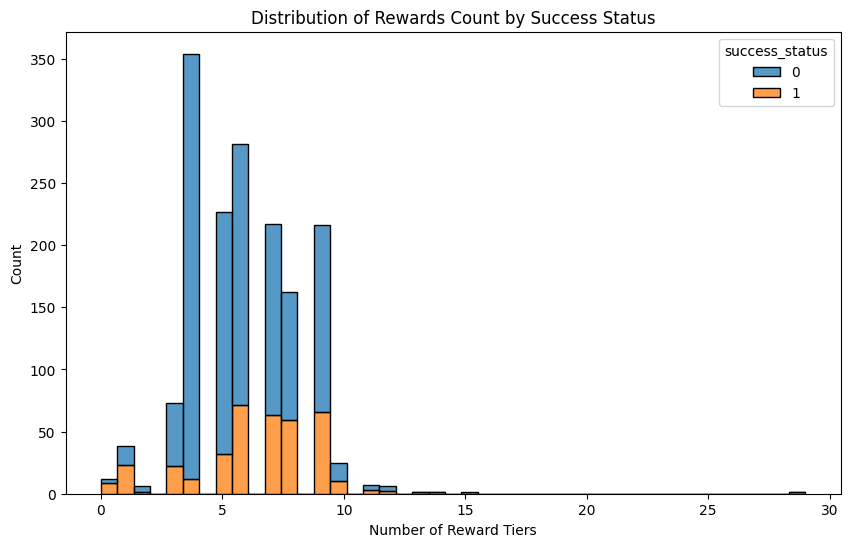

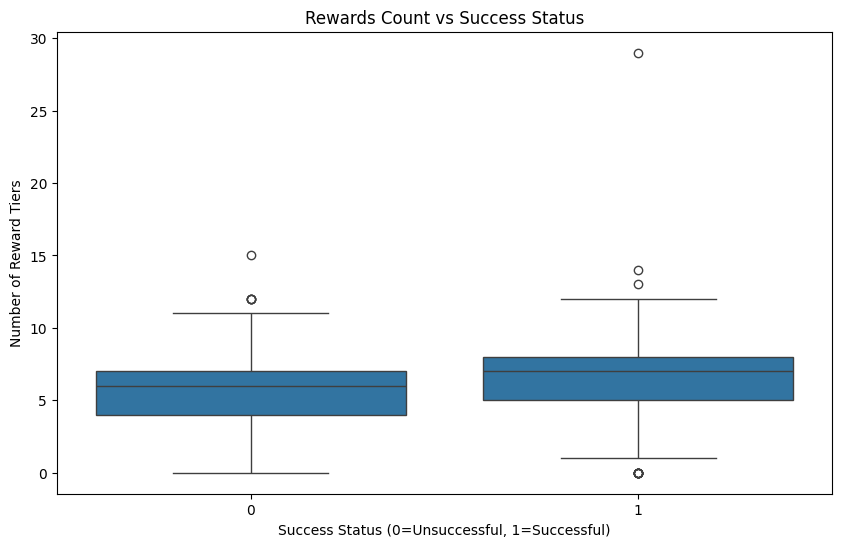

In [ ]:
# Specific analysis for rewards_count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rewards_count', hue='success_status', multiple='stack')
plt.title('Distribution of Rewards Count by Success Status')
plt.xlabel('Number of Reward Tiers')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='success_status', y='rewards_count')
plt.title('Rewards Count vs Success Status')
plt.xlabel('Success Status (0=Unsuccessful, 1=Successful)')
plt.ylabel('Number of Reward Tiers')
plt.show()

# Fitting into Model - Classification

## Decision Trees


In [ ]:
#
drop_columns = ['project_id', 'project_name', 'project_owner', 'project_description', 'funding_received','funding_percentage','backers_count']
df = df.drop(columns=drop_columns)
df['success_status'] = df['success_status'].map({'successful': 1, 'unsuccessful': 0})

In [ ]:
categorical_cols = ['platform_name', 'crowdfunding_type', 'category', 'funding_method', 'owner_gender',
                    'location', 'region', 'has_promo_video', 'has_faq', 'has_website', 'has_social_media']
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('success_status').tolist()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_cols)
    ])

In [ ]:
X = df.drop('success_status', axis=1)
y = df['success_status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix

smote = SMOTE(random_state=42)
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

X_test_transformed = preprocessor.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:

# Step 5: Optimize Decision Tree
dt_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 80],
    'classifier__min_samples_split': [2, 5, 10]
}
dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42, criterion="entropy"))
])

dt_grid_search = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',  # Optimize for F1-score due to imbalance
    n_jobs=-1
)

# Fit GridSearchCV
dt_grid_search.fit(X_train_resampled, y_train_resampled)


# Best Decision Tree model
best_dt = dt_grid_search.best_estimator_
print("\nDecision Tree - Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree - Best F1 Score:", dt_grid_search.best_score_)




Decision Tree - Best Parameters: {'classifier__max_depth': 80, 'classifier__min_samples_split': 10}
Decision Tree - Best F1 Score: 0.8809112987655761


In [ ]:
y_pred_dt = best_dt.predict(X_test_transformed)
y_pred_proba_dt = best_dt.predict_proba(X_test_transformed)[:, 1]
print("\nDecision Tree - Test Set Results:")
print(classification_report(y_test, y_pred_dt))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_dt):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_pred_proba_dt):.4f}")



Decision Tree - Test Set Results:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       251
           1       0.69      0.67      0.68        75

    accuracy                           0.86       326
   macro avg       0.80      0.79      0.79       326
weighted avg       0.85      0.86      0.85       326

ROC-AUC: 0.8251
PR-AUC: 0.5966


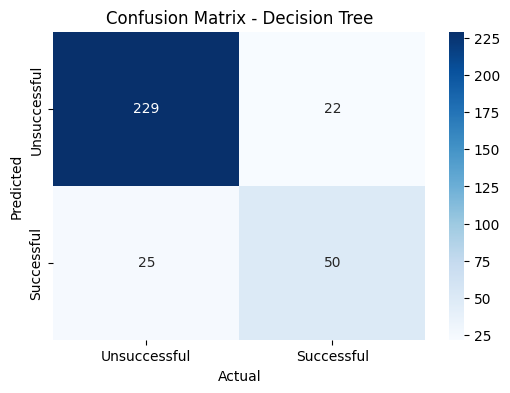

In [ ]:
# Confusion Matrix (Actual on x-axis, Predicted on y-axis)
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unsuccessful', 'Successful'],
            yticklabels=['Unsuccessful', 'Successful'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

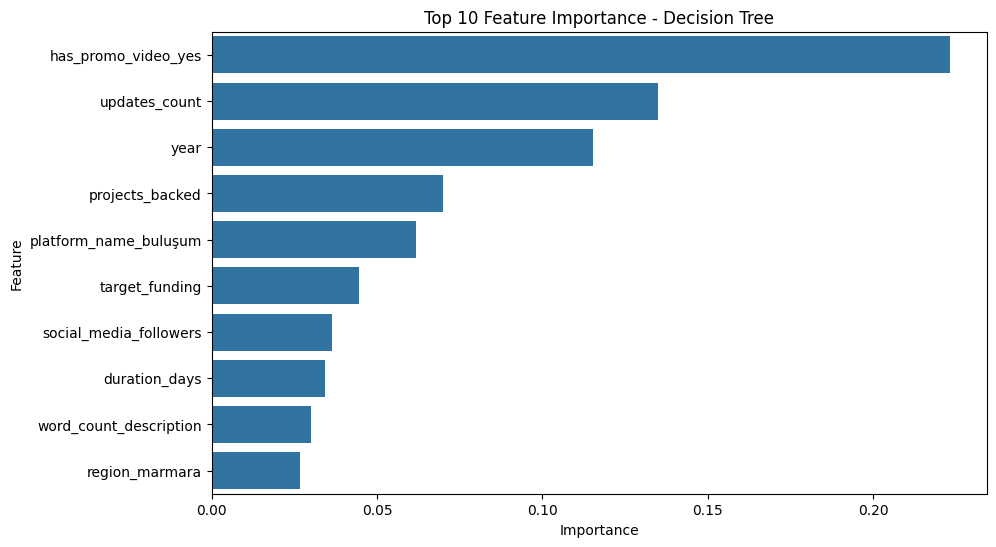

In [ ]:
# Step 7: Feature Importance (for both models)
# Get feature names
num_features = numerical_cols
cat_features = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([num_features, cat_features])

# Decision Tree Feature Importance
dt_importance = best_dt.named_steps['classifier'].feature_importances_
dt_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importance})
dt_feature_importance = dt_feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance.head(10))
plt.title('Top 10 Feature Importance - Decision Tree')
plt.show()


## LDA


LDA - Test Set Results:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       251
           1       0.58      0.84      0.68        75

    accuracy                           0.82       326
   macro avg       0.76      0.83      0.78       326
weighted avg       0.86      0.82      0.83       326

ROC-AUC: 0.8859
PR-AUC: 0.7060


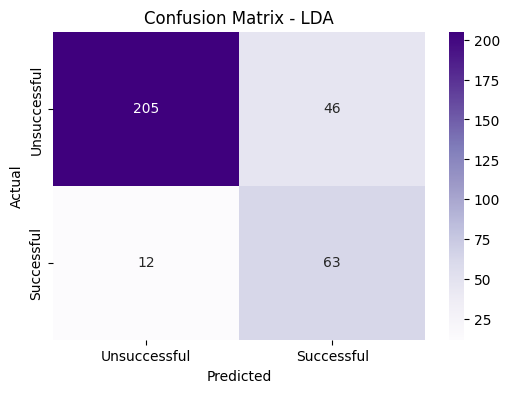

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix

# Step 1: Convert sparse matrices to dense
X_train_resampled_dense = X_train_resampled.toarray()
X_test_transformed_dense = X_test_transformed.toarray()

# Step 2: Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_resampled_dense, y_train_resampled)

# Step 3: Predictions
y_pred_lda = lda.predict(X_test_transformed_dense)
y_pred_proba_lda = lda.predict_proba(X_test_transformed_dense)[:, 1]

# Step 4: Evaluation
print("\nLDA - Test Set Results:")
print(classification_report(y_test, y_pred_lda))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lda):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_pred_proba_lda):.4f}")

# Step 5: Confusion Matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Unsuccessful', 'Successful'],
            yticklabels=['Unsuccessful', 'Successful'])
plt.title('Confusion Matrix - LDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM


SVM - Test Set Results:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       251
           1       0.59      0.68      0.63        75

    accuracy                           0.82       326
   macro avg       0.75      0.77      0.76       326
weighted avg       0.83      0.82      0.82       326

ROC-AUC: 0.8734
PR-AUC: 0.7058


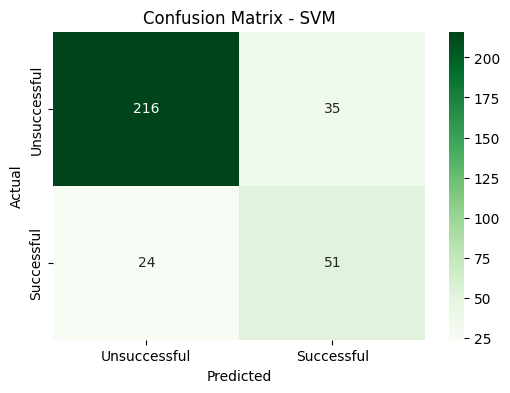

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix

# Step 1: Train SVM model (with probability=True to get predicted probabilities)
svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train_resampled_dense, y_train_resampled)

# Step 2: Predictions
y_pred_svm = svm.predict(X_test_transformed_dense)
y_pred_proba_svm = svm.predict_proba(X_test_transformed_dense)[:, 1]

# Step 3: Evaluation
print("\nSVM - Test Set Results:")
print(classification_report(y_test, y_pred_svm))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_svm):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_pred_proba_svm):.4f}")

# Step 4: Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Unsuccessful', 'Successful'],
            yticklabels=['Unsuccessful', 'Successful'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGBoost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=1,  # Because you handled imbalance with SMOTE
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_resampled_dense, y_train_resampled)

# Predict
y_pred_xgb = xgb.predict(X_test_transformed_dense)
y_pred_proba_xgb = xgb.predict_proba(X_test_transformed_dense)[:, 1]

# Evaluation
print("\nXGBoost - Test Set Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_pred_proba_xgb):.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:09:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Test Set Results:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       251
           1       0.74      0.71      0.72        75

    accuracy                           0.87       326
   macro avg       0.82      0.82      0.82       326
weighted avg       0.87      0.87      0.87       326

ROC-AUC: 0.9153
PR-AUC: 0.8175


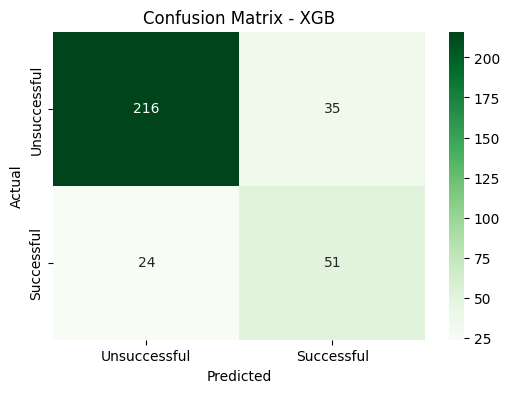

In [ ]:
# Step 4: Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Unsuccessful', 'Successful'],
            yticklabels=['Unsuccessful', 'Successful'])
plt.title('Confusion Matrix - XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
num_features = numerical_cols  # Already defined
cat_features = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([num_features, cat_features])

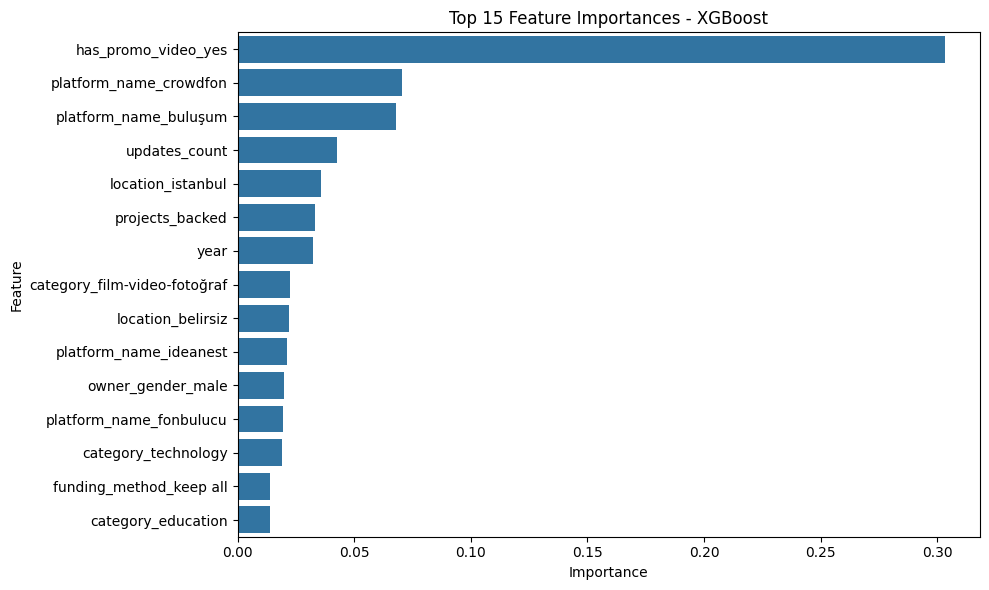

In [ ]:
importances = xgb.feature_importances_
xgb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

xgb_importance = xgb_importance.sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(15))
plt.title('Top 15 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

## Logistic Reg


Logistic Regression - Test Set Results:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       251
           1       0.59      0.72      0.65        75

    accuracy                           0.82       326
   macro avg       0.75      0.78      0.76       326
weighted avg       0.84      0.82      0.83       326

ROC-AUC: 0.8884
PR-AUC: 0.7381


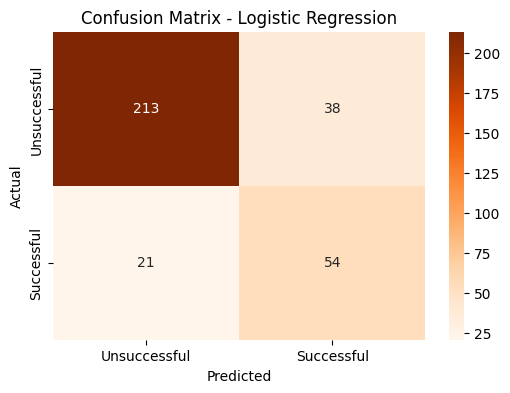

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix

# Step 1: Train Logistic Regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_resampled_dense, y_train_resampled)

# Step 2: Predict
y_pred_logreg = logreg.predict(X_test_transformed_dense)
y_pred_proba_logreg = logreg.predict_proba(X_test_transformed_dense)[:, 1]

# Step 3: Evaluation
print("\nLogistic Regression - Test Set Results:")
print(classification_report(y_test, y_pred_logreg))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_logreg):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_pred_proba_logreg):.4f}")

# Step 4: Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Unsuccessful', 'Successful'],
            yticklabels=['Unsuccessful', 'Successful'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## GroupBy Analysis

In [ ]:
# 1. Rebuild the original test set with decoded features
X_test_original = X_test.copy()
X_test_original['success_status'] = y_test

# If you want to work on the transformed dataset, make sure categorical features are available
# Otherwise, use the original X_test + y_test as I am doing here

# 2. Backers Count Binning and Success Rate
X_test_original['backers_bin'] = pd.cut(X_test_original['backers_count'],
                                        bins=[-1, 0, 10, 50, 100, 500, 1000, np.inf],
                                        labels=['0', '1-10', '11-50', '51-100', '101-500', '501-1000', '1000+'])

backers_success = X_test_original.groupby('backers_bin')['success_status'].mean().reset_index()

print("\nSuccess Rate by Number of Backers:")
print(backers_success)

# 3. Success Rate by Region
if 'region' in X_test_original.columns:
    region_success = X_test_original.groupby('region')['success_status'].mean().sort_values(ascending=False)
    print("\nSuccess Rate by Region:")
    print(region_success)

# 4. Success Rate by Funding Method
if 'funding_method' in X_test_original.columns:
    funding_method_success = X_test_original.groupby('funding_method')['success_status'].mean().sort_values(ascending=False)
    print("\nSuccess Rate by Funding Method:")
    print(funding_method_success)

# 5. Success Rate by Category
if 'category' in X_test_original.columns:
    category_success = X_test_original.groupby('category')['success_status'].mean().sort_values(ascending=False)
    print("\nSuccess Rate by Category:")
    print(category_success)

# 6. Optionally: Success Rate by Platform
if 'platform_name' in X_test_original.columns:
    platform_success = X_test_original.groupby('platform_name')['success_status'].mean().sort_values(ascending=False)
    print("\nSuccess Rate by Platform:")
    print(platform_success)

NameError: name 'X_test' is not defined

Dataset Columns: ['project_id', 'platform_name', 'crowdfunding_type', 'category', 'funding_method', 'project_name', 'project_owner', 'owner_gender', 'projects_backed', 'projects_subscribed', 'projects_owned', 'projects_in_teams', 'location', 'region', 'year', 'start_date', 'end_date', 'duration_days', 'has_promo_video', 'video_length', 'image_count', 'has_faq', 'updates_count', 'comments_count', 'backers_count', 'rewards_count', 'team_size', 'has_website', 'has_social_media', 'social_media_count', 'social_media_followers', 'tags_count', 'word_count_description', 'project_description', 'target_funding', 'funding_received', 'funding_percentage', 'success_status']

Analysis 1: Success Rate by Funding Size and Duration
      funding_size_bin          duration_bin  success_rate  campaign_count  \
7     Medium (10K-50K)  Very Long (>90 days)         1.000               2   
10    Large (50K-100K)     Long (60-90 days)         0.429               7   
0         Small (<10K)      Short (<30 da

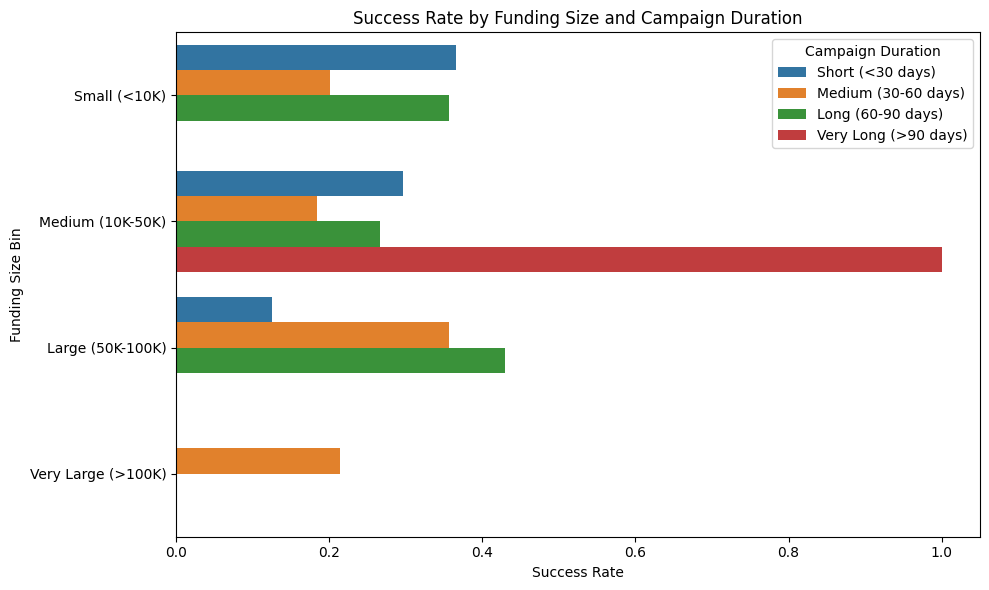

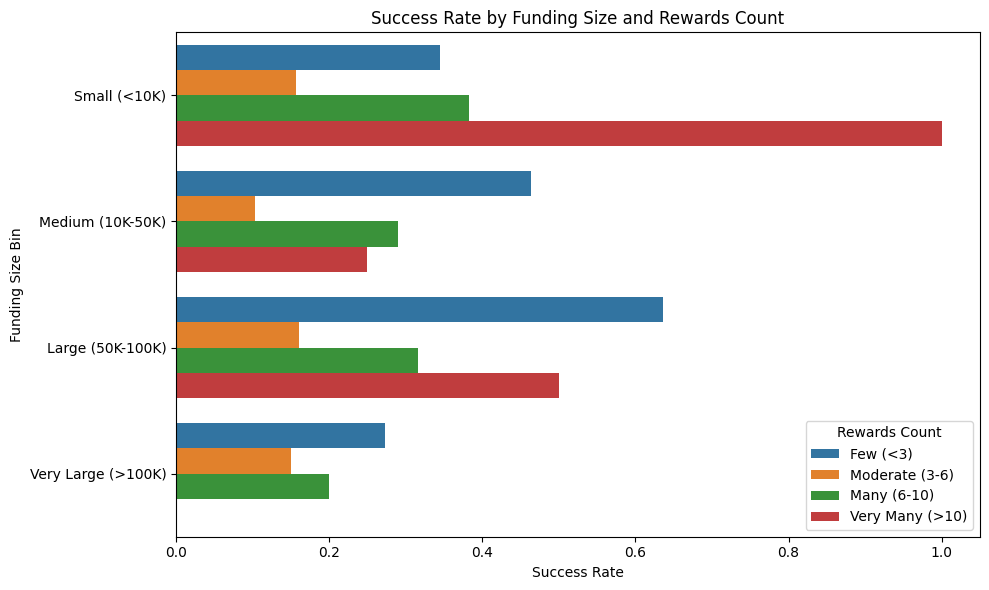

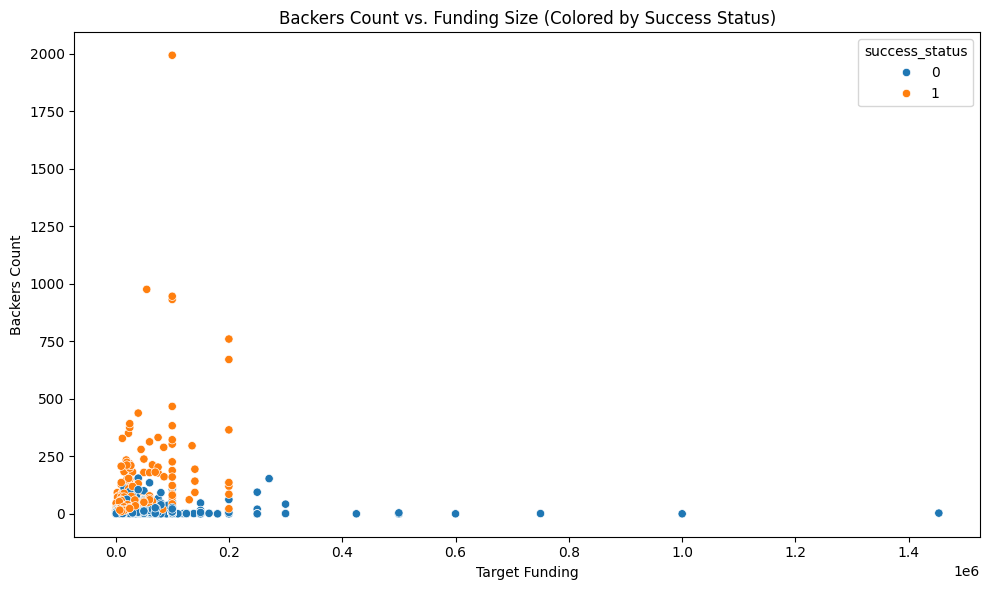

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace with actual path or UCI repository URL)
data = pd.read_csv('Translated_Crowdfunding_Dataset.csv')  # Placeholder: Replace with actual file path


# Verify column names (for debugging)
print("Dataset Columns:", data.columns.tolist())

# Convert success_status to numeric (1 for successful, 0 for unsuccessful)
data['success_status'] = data['success_status'].map({'successful': 1, 'unsuccessful': 0})

# Select relevant columns for analysis
columns_of_interest = ['target_funding', 'duration_days', 'rewards_count', 'backers_count', 'success_status']
data = data[columns_of_interest]

# Handle missing values
data = data.fillna({
    'target_funding': data['target_funding'].median(),
    'duration_days': data['duration_days'].median(),
    'rewards_count': data['rewards_count'].median(),
    'backers_count': data['backers_count'].median(),
    'success_status': 0  # If any success_status is missing, assume unsuccessful
})

# Step 1: Bin the Features
# Funding Size (target_funding) - Create bins
funding_bins = [0, 10000, 50000, 100000, float('inf')]
funding_labels = ['Small (<10K)', 'Medium (10K-50K)', 'Large (50K-100K)', 'Very Large (>100K)']
data['funding_size_bin'] = pd.cut(data['target_funding'], bins=funding_bins, labels=funding_labels, include_lowest=True)

# Campaign Duration (duration_days) - Create bins
duration_bins = [0, 30, 60, 90, float('inf')]
duration_labels = ['Short (<30 days)', 'Medium (30-60 days)', 'Long (60-90 days)', 'Very Long (>90 days)']
data['duration_bin'] = pd.cut(data['duration_days'], bins=duration_bins, labels=duration_labels, include_lowest=True)

# Rewards Count (rewards_count) - Create bins
rewards_bins = [0, 3, 6, 10, float('inf')]
rewards_labels = ['Few (<3)', 'Moderate (3-6)', 'Many (6-10)', 'Very Many (>10)']
data['rewards_count_bin'] = pd.cut(data['rewards_count'], bins=rewards_bins, labels=rewards_labels, include_lowest=True)

# Analysis 1: Funding Size and Duration - Does duration affect success rate?
print("\nAnalysis 1: Success Rate by Funding Size and Duration")
groupby_funding_duration = data.groupby(['funding_size_bin', 'duration_bin'], observed=True).agg({
    'success_status': ['mean', 'count'],
    'target_funding': 'mean',
    'duration_days': 'mean'
}).reset_index()

# Flatten column names
groupby_funding_duration.columns = [
    'funding_size_bin', 'duration_bin',
    'success_rate', 'campaign_count', 'avg_funding_goal', 'avg_duration'
]

# Round numerical columns (fixed variable name)
groupby_funding_duration = groupby_funding_duration.round({
    'success_rate': 3, 'avg_funding_goal': 2, 'avg_duration': 2
})

# Sort by success rate
groupby_funding_duration = groupby_funding_duration.sort_values(by='success_rate', ascending=False)

# Display results
print(groupby_funding_duration.head(10))

# Visualize success rate by funding size and duration
plt.figure(figsize=(10, 6))
sns.barplot(
    x='success_rate', y='funding_size_bin', hue='duration_bin',
    data=groupby_funding_duration
)
plt.title('Success Rate by Funding Size and Campaign Duration')
plt.xlabel('Success Rate')
plt.ylabel('Funding Size Bin')
plt.legend(title='Campaign Duration')
plt.tight_layout()
plt.savefig('success_rate_funding_duration.png')

# Analysis 2: Funding Size and Rewards Count - Does rewards count affect success rate?
print("\nAnalysis 2: Success Rate by Funding Size and Rewards Count")
groupby_funding_rewards = data.groupby(['funding_size_bin', 'rewards_count_bin'], observed=True).agg({
    'success_status': ['mean', 'count'],
    'target_funding': 'mean',
    'rewards_count': 'mean'
}).reset_index()

# Flatten column names
groupby_funding_rewards.columns = [
    'funding_size_bin', 'rewards_count_bin',
    'success_rate', 'campaign_count', 'avg_funding_goal', 'avg_rewards_count'
]

# Round numerical columns
groupby_funding_rewards = groupby_funding_rewards.round({
    'success_rate': 3, 'avg_funding_goal': 2, 'avg_rewards_count': 2
})

# Sort by success rate
groupby_funding_rewards = groupby_funding_rewards.sort_values(by='success_rate', ascending=False)

# Display results
print(groupby_funding_rewards.head(10))

# Visualize success rate by funding size and rewards count
plt.figure(figsize=(10, 6))
sns.barplot(
    x='success_rate', y='funding_size_bin', hue='rewards_count_bin',
    data=groupby_funding_rewards
)
plt.title('Success Rate by Funding Size and Rewards Count')
plt.xlabel('Success Rate')
plt.ylabel('Funding Size Bin')
plt.legend(title='Rewards Count')
plt.tight_layout()
plt.savefig('success_rate_funding_rewards.png')

# Analysis 3: Correlation between Backers Count and Funding Size
print("\nAnalysis 3: Correlation between Backers Count and Funding Size")
correlation = data['backers_count'].corr(data['target_funding'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='target_funding', y='backers_count', hue='success_status', data=data)
plt.title('Backers Count vs. Funding Size (Colored by Success Status)')
plt.xlabel('Target Funding')
plt.ylabel('Backers Count')
plt.tight_layout()
plt.savefig('backers_funding_correlation.png')

# Step 4: Save Results
groupby_funding_duration.to_csv('funding_duration_analysis.csv', index=False)
groupby_funding_rewards.to_csv('funding_rewards_analysis.csv', index=False)
print("Analyses saved to 'funding_duration_analysis.csv' and 'funding_rewards_analysis.csv'")